In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv("/content/GOOGL.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df = df[["Close"]]
df["Days"] = (df.index - df.index.min()).days



In [4]:
X = df["Days"].values.reshape(-1, 1)
y = df["Close"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [5]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 733.67
Mean Squared Error (MSE): 871895.11
Root Mean Squared Error (RMSE): 933.75


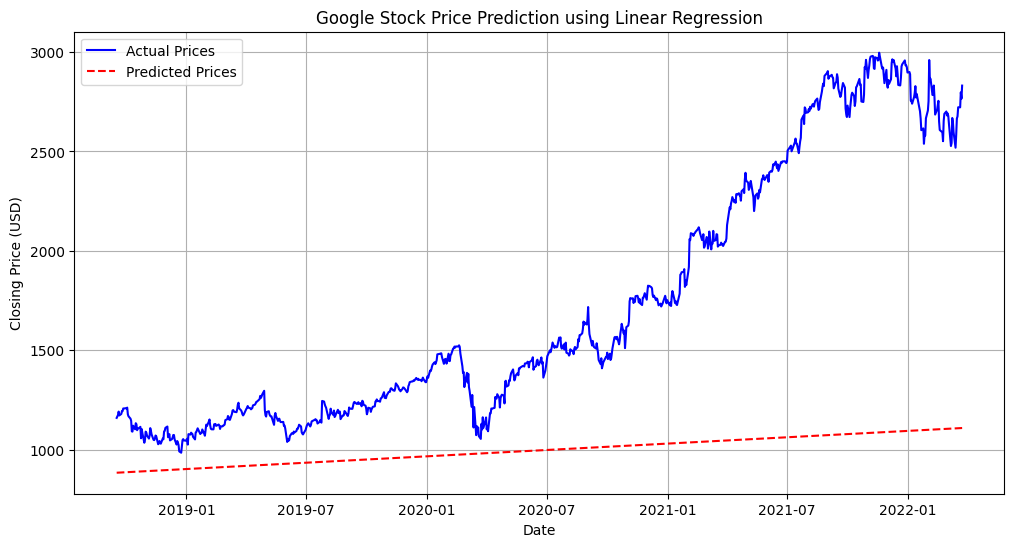

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[len(X_train):], y_test, label="Actual Prices", color="blue")
plt.plot(df.index[len(X_train):], y_pred, label="Predicted Prices", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Google Stock Price Prediction using Linear Regression")
plt.legend()
plt.grid()
plt.show()


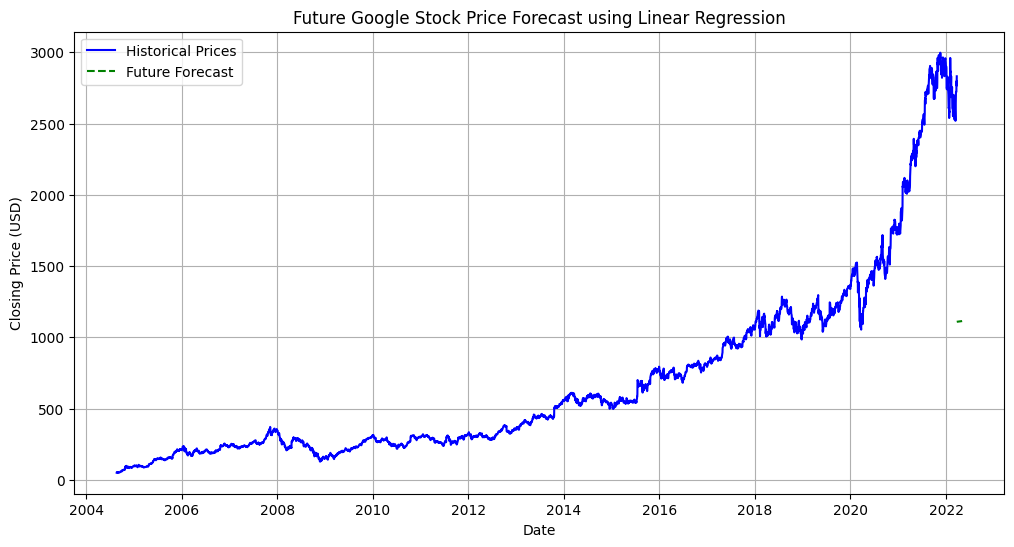

In [7]:
future_days = np.array(range(df["Days"].max() + 1, df["Days"].max() + 31)).reshape(-1, 1)
future_pred = model.predict(future_days)

future_dates = pd.date_range(start=df.index.max(), periods=30, freq="B")  # Business days
forecast_df = pd.DataFrame({"Date": future_dates, "Predicted Close": future_pred})

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Historical Prices", color="blue")
plt.plot(forecast_df["Date"], forecast_df["Predicted Close"], label="Future Forecast", color="green", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Future Google Stock Price Forecast using Linear Regression")
plt.legend()
plt.grid()
plt.show()
